# Laboratorio 4 - Aprendizaje profundo para la clasificación de imágenes


Siga las instrucciones en negritas para completar el laboratorio.

------------

## El reto

**Su tarea es la de construir un clasificador de imágenes usando Keras (Tensorflow) y Redes Neuronales Convolucionales (CNN) para un conjunto de datos conocido como "Fashion MNIST dataset""
. Este conjunto de datos incluye 10 etiquetas de diferentes tipos de ropa con imágenes de 28 by 28 *escalagris*. Hay un conjunto de datos de entrenamiento de 60,000 imágenes y un conjunto de datos de prueba de 10,000 imágenes.**

    Etiqueta	Descripción
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

## Los datos

**Tarea 1: Ejecute el siguiente código para descargar los datos usando Keras.**

In [1]:
from tensorflow.keras.datasets import fashion_mnist

(X_entreno, y_entreno), (X_prueba, y_prueba) = fashion_mnist.load_data()

## Visualización de los Datos

**TAREA 2: Utilice matplotlib para visualizar una imagen del conjunto de datos.  Puede ser cualquier imagen del conjunto de datos.**

##  Visualización de los datos de las imágenes

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
X_entreno.shape

(60000, 28, 28)

In [4]:
X_entreno[0].shape

(28, 28)

In [5]:
zapato = X_entreno[0]
zapato

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

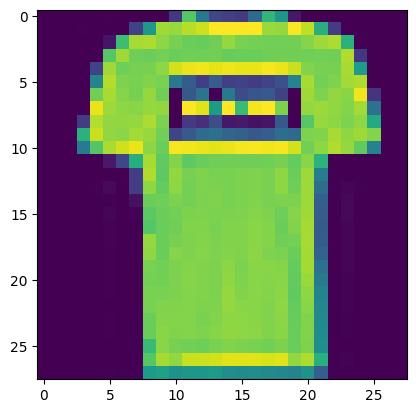

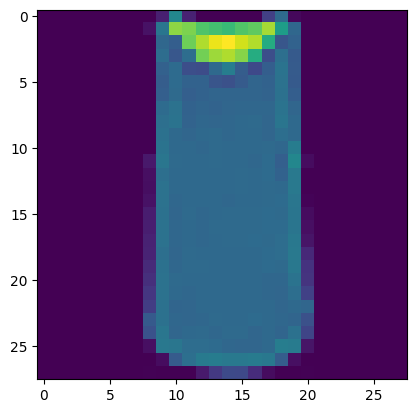

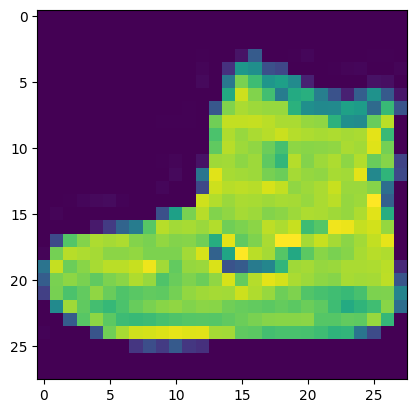

In [6]:
img1 = X_entreno[1]
plt.imshow(img1)
plt.show()
img2 = X_entreno[2]
plt.imshow(img2)
plt.show()
img3 = X_entreno[0]
plt.imshow(img3)
plt.show()

Matplotlib tiene una variedad de esquemas de colores "colormaps". Eso hace que las imagenes se vean de esta forma, el cual es el objetivo. Si quisieramos podriamos cambiar el esquema para que se vea en otro formato

## Preprocesamiento de los Datos X

**TAREA 3: Normalice los datos X entreno y X prueba dividiendo por el valor máximo de los arreglos de las imágenes.**




Al trabajar este ejercicio con imágenes, buscamos los datos maximos y minimos, y al ser conimagenes, sabemos que todos los valores serán entre 0 y 255 por los podemos normalizar dividiendo por el valor maximo de los arreglos de las imagenes

In [7]:
zapato.max()

255

In [8]:
zapato.min()

0

In [9]:
X_entreno = X_entreno / 255
X_prueba = X_prueba / 255

In [10]:
normalizacion = X_entreno[0]

In [11]:
normalizacion.max()

1.0

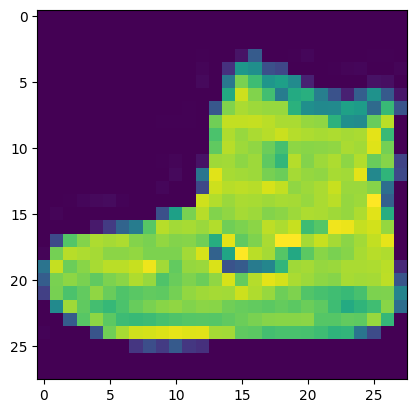

In [12]:
plt.imshow(normalizacion)

Se cumple con el objetivo, se ve igual despues de la normalizacion

**TAREA 4: Cambie el formato de los arreglos X para que incluyan una 4rta dimensión del canal de color. Similar a lo que se hizo en clase para el conjunto de datos MNIST de números.**


In [13]:
X_entreno.shape

(60000, 28, 28)

In [14]:
X_prueba.shape

(10000, 28, 28)

Modificar la forma para incluir la dimensión correspondiente al canal, agregamos 4 dimensiones al formato

In [15]:
X_entreno = X_entreno.reshape(60000, 28, 28, 1, 1)

In [16]:
X_entreno.shape

(60000, 28, 28, 1, 1)

In [17]:
X_prueba = X_prueba.reshape(10000, 28, 28, 1, 1)

In [18]:
X_prueba.shape

(10000, 28, 28, 1, 1)

**TAREA 5: Convierta los valores de y_entreno y y_prueba para que estén "one-hot encoded" para poder hacer un análisis categórico con Keras.**


lo que se hara aqui es buscar que las las etiquetas sean comprensibles por nuestra CNN

In [19]:
y_entreno

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [20]:
y_prueba

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

Se obtiene que el tipo de dato que hay en y_entreno y y_prueba son de categorías numéricas, pero están en formato numérico.  Será necesario convertirlos por el método de "one hot encoding" para que puedan ser usadas por la CNN

In [21]:
from tensorflow.keras.utils import to_categorical

hacemos la conversion

In [22]:
y_entreno.shape

(60000,)

In [23]:
ejemplo_y = to_categorical(y_entreno)

In [24]:
ejemplo_y

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [25]:
ejemplo_y.shape

(60000, 10)

In [26]:
ejemplo_y[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

el método to_categorical puede inferir, por default, el número de clases...y lo hace bastante bien.  Sin embargo, si queremos estar seguros (podría ser que nuestros datos no tuvieran uno de los posibles valores), o si fuera un caso más complicado, lo podemos especificar.  En este caso son 10

In [27]:
y_cat_test = to_categorical(y_prueba, 10)

In [28]:
y_cat_train = to_categorical(y_entreno, 10)

## Entrenamiento del Modelo
**TAREA 6: Utilice Keras para crear un modelo que contenga, al menos, las siguientes capas (pero siéntase en libertad de experimentar):**

* Capa "2D Convolutional", filtros = 32 y tamaño_kernel = (4, 4)
* Capa de "Pooling""
 de tamaño = (2, 2)

* Capa de Aplanado
* Capa Densa (128 unidades, pero siéntase en libertad de "jugar"con este valor), activación RELU

* Una capa Final Densa de 10 unidades con activación softmax

**Luego compile el modelo con estos parámetros: loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy']**

Importamos para crear capas normales, capas convolucionales, capas de pooling, y necesitaremos una capa para "aplanar" los datos (a una sola dimensión)

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [30]:
modelo = Sequential()

### Capa Convolucional

Esta capa crea un núcleo de convolución que se convoluciona con la entrada de la capa para producir un tensor de salidas.

El número de filtros que se utilizara es 32. Cómo el filtro se irá "corriendo" es bueno que el tamaño de la imagen sea un múltiplo del tamaño del filtro

In [31]:
modelo.add(Conv2D(filters = 32, kernel_size = (4, 4), input_shape = (28, 28, 1), activation = 'relu'))

### Capa de sub-muestreo (Pooling)

In [32]:
modelo.add(MaxPool2D(pool_size = (2, 2)))

### Capa para aplanar 

Antes de llegar a la capa final es importante "aplanar" de 28 X 28 a 764 

In [33]:
modelo.add(Flatten())

### Capas densa

Serán de 128 "neuronas" o unidades (este valor es configurable)

In [34]:
modelo.add(Dense(128, activation = 'relu'))

### La última capa densa es la clasificadora

Tenemos 10 posibles clases por lo que se usa la función de activación "softmax" que es para multi-clases

In [35]:
modelo.add(Dense(10, activation = 'softmax'))

## Configuración del Modelo


In [36]:
modelo.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [37]:
############################no correr aun, solo es para tenerlo listo
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
__________________________________________________

### Uso de "callbacks"

In [38]:
from tensorflow.keras.callbacks import EarlyStopping

In [39]:
detencion_temprana = EarlyStopping(monitor = 'val_loss', patience = 2)

### Entrenamiento del Modelo
**TAREA 6: Entrene/Ajuste el modelo con el conjunto X_entreno set. La cantidad de épocas le queda a Ud determinar.**

In [40]:
############################no correr aun, solo es para tenerlo listo
modelo.fit(X_entreno, 
           y_cat_train, 
           epochs = 10, 
           validation_data = (X_prueba,y_cat_test))
           #callbacks = [detencion_temprana])

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4088 - accuracy: 0.8523 - val_loss: 0.3188 - val_accuracy: 0.8866
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2800 - accuracy: 0.8985 - val_loss: 0.3315 - val_accuracy: 0.8876
Epoch 3/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2411 - accuracy: 0.9122 - val_loss: 0.2726 - val_accuracy: 0.9028
Epoch 4/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2182 - accuracy: 0.9229 - val_loss: 0.3764 - val_accuracy: 0.8752
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1983 - accuracy: 0.9288 - val_loss: 0.2813 - val_accuracy: 0.9077
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1831 - accuracy: 0.9338 - val_loss: 0.2820 - val_accuracy: 0.9030
Epoch 7/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1707 - accuracy: 0.9393 - val_loss: 0.3098 - val_ac

### Evaluación del Modelo

**TAREA 7: Muestre los valores de [accuracy, precision, recall, f1-score] que logró el modelo con el conjunto de datos X_prueba data set. Tenga en mente que hay múltiples formas de hacer esto.  Sin embargo, le recomendamos que utilice el mismo procedimiento usado mencionado en la parte de intuición, en clase.**

In [59]:
modelo.metrics_names

['loss', 'accuracy']

In [60]:
perdidas = pd.DataFrame(modelo.history.history)

In [61]:
perdidas.head()

""


In [62]:
perdidas[['accuracy', 'val_accuracy']].plot()

KeyError: "None of [Index(['accuracy', 'val_accuracy'], dtype='object')] are in the [columns]"

In [63]:
perdidas[['loss', 'val_loss']].plot()

KeyError: "None of [Index(['loss', 'val_loss'], dtype='object')] are in the [columns]"

In [64]:
print(modelo.metrics_names)
print(modelo.evaluate(X_prueba, y_cat_test, verbose = 0))

['loss', 'accuracy']
[0.3417311906814575, 0.9096999764442444]


In [65]:
from sklearn.metrics import classification_report, confusion_matrix

In [66]:
predicciones = modelo.predict_classes(X_prueba)

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [67]:
y_cat_test.shape

(10000, 10)

In [68]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [69]:
predicciones[0]

NameError: name 'predicciones' is not defined

In [ ]:
y_prueba

In [ ]:
print(classification_report(y_prueba, predicciones))